1. What could go wrong with my data?

Missing values?
Duplicate customers?
Inconsistent column names?
Wrong data types?


2. What does "clean data" look like?

No missing values (or handled properly)
No duplicates
Consistent naming (lowercase, underscores)
Correct data types (numbers as numbers, text as text)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/churn.csv")
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [11]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Dataset shape: (10, 7)

First 5 rows:
   customerID  tenure  monthly_charges  total_charges        contract  \
0           1       1            29.85          29.85  Month-to-month   
1           2      34            56.95        1936.30        One year   
2           3       2            53.85         108.15  Month-to-month   
3           4      45            42.30        1845.60        Two year   
4           5       8            70.70         565.60  Month-to-month   

     payment_method churn  
0       Credit card   Yes  
1  Electronic check    No  
2  Electronic check   Yes  
3       Credit card    No  
4     Bank transfer   Yes  

Data types:
customerID           int64
tenure               int64
monthly_charges    float64
total_charges      float64
contract               str
payment_method         str
churn                  str
dtype: object


## Current Dataset State
- Rows: 10
- Columns: 7
- Observations: No error

In [12]:
# Count missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# Percentage missing (easier to understand)
print("\nMissing % per column:")
missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_pct)

Missing values per column:
customerID         0
tenure             0
monthly_charges    0
total_charges      0
contract           0
payment_method     0
churn              0
dtype: int64

Missing % per column:
customerID         0.0
tenure             0.0
monthly_charges    0.0
total_charges      0.0
contract           0.0
payment_method     0.0
churn              0.0
dtype: float64


No missing values

In [13]:
# Count duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# If duplicates exist, show them
if duplicates > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated(keep=False)])
    
    # Remove duplicates
    df = df.drop_duplicates()
    print(f"\n✅ Removed {duplicates} duplicates")
    print(f"New shape: {df.shape}")
else:
    print("✅ No duplicates found!")

Number of duplicate rows: 0
✅ No duplicates found!


## Duplicates Check
- Duplicates found: 0
- Action taken: none needed

In [14]:
# Before standardization
print("Original columns:", df.columns.tolist())

# Standardize: lowercase + underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# After standardization
print("Standardized columns:", df.columns.tolist())

Original columns: ['customerID', 'tenure', 'monthly_charges', 'total_charges', 'contract', 'payment_method', 'churn']
Standardized columns: ['customerid', 'tenure', 'monthly_charges', 'total_charges', 'contract', 'payment_method', 'churn']


In [15]:
# Check current encoding
print("Churn column values:")
print(df['churn'].value_counts())
print("\nData type:", df['churn'].dtype)

Churn column values:
churn
Yes    5
No     5
Name: count, dtype: int64

Data type: str


## Churn Column Status
- Current encoding: Yes/No
- Data type: int64
- Action needed: convert to binary

In [16]:
# Save cleaned data
df.to_csv("../data/churn_cleaned.csv", index=False)
print("✅ Cleaned dataset saved to: ../data/churn_cleaned.csv")

# Verify it saved correctly
df_test = pd.read_csv("../data/churn_cleaned.csv")
print(f"Verification: Loaded {df_test.shape[0]} rows, {df_test.shape[1]} columns")


✅ Cleaned dataset saved to: ../data/churn_cleaned.csv
Verification: Loaded 10 rows, 7 columns


# Day 2 Summary - Data Cleaning

## What I Did Today
1. Loaded dataset and inspected current state
2. Checked for missing values → [No missing value]
3. Checked for duplicates → [No duplicated]
4. Standardized column names → lowercase + underscores
5. Verified churn column encoding → [Yes/No]
6. Saved cleaned dataset

## Key Learnings
- .sum() counts
- Learned that .isnull().sum() counts missing values
- that keep=False shows all duplicate copies
- Understood why standardized column names prevent errors
- Machine learning needs numbers, not text

## Decisions Made
- Found 0 missing values, so no imputation needed
- Current encoding uses Yes/No, so change that to 1/0.
- Found 0 duplicates, no duplicated data removed.

## Questions for Tomorrow
- Ask if I need to know the manual computation for mean, median, mode.
- If there are missing values, how will I know if what I need to fill is mean, mode or drop rows etc?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style (makes charts prettier)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load cleaned data
df = pd.read_csv("../data/churn_cleaned.csv")

print("✅ Data loaded successfully!")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nFirst 5 rows:")
print(df.head())

✅ Data loaded successfully!
Shape: 10 rows, 7 columns

First 5 rows:
   customerid  tenure  monthly_charges  total_charges        contract  \
0           1       1            29.85          29.85  Month-to-month   
1           2      34            56.95        1936.30        One year   
2           3       2            53.85         108.15  Month-to-month   
3           4      45            42.30        1845.60        Two year   
4           5       8            70.70         565.60  Month-to-month   

     payment_method churn  
0       Credit card   Yes  
1  Electronic check    No  
2  Electronic check   Yes  
3       Credit card    No  
4     Bank transfer   Yes  


Churn Value Counts:
churn
Yes    5
No     5
Name: count, dtype: int64

Churn Percentages:
churn
Yes    50.0
No     50.0
Name: proportion, dtype: float64


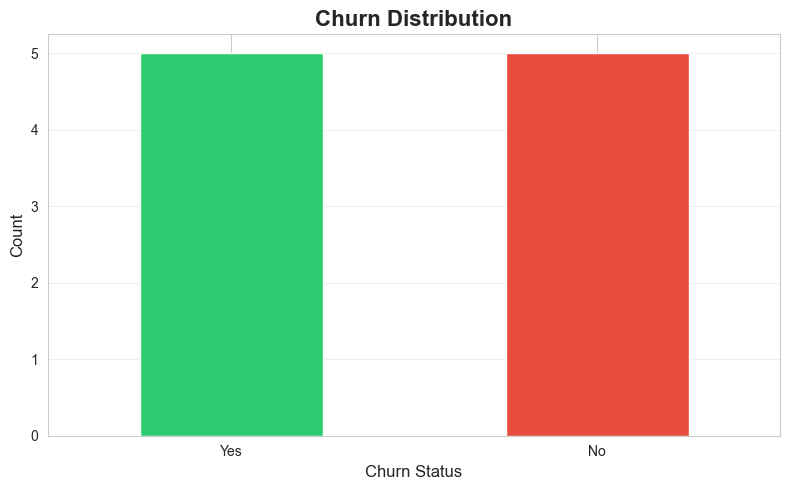

In [2]:
# Count churn values
print("Churn Value Counts:")
print(df['churn'].value_counts())

print("\nChurn Percentages:")
churn_pct = df['churn'].value_counts(normalize=True) * 100
print(churn_pct)

# Visualize
plt.figure(figsize=(8, 5))
df['churn'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

1. Whats the churn rate? - 50%
2. Is it balanced or imbalanced - Balanced

## Churn Rate Metrics

**Current State:**
- Churn Rate: 50%
- Retention Rate: 50%
- Business health: Critical

**Goal:**
- Reduce churn by 40-45% using predictive modeling

In [3]:
# Get the statistics you need
print("TENURE:")
print(f"  Average: {df['tenure'].mean():.1f} months")
print(f"  Range: {df['tenure'].min():.0f} to {df['tenure'].max():.0f} months")
print(f"  Median: {df['tenure'].median():.1f} months")

print("\nMONTHLY CHARGES:")
print(f"  Average: ${df['monthly_charges'].mean():.2f}")
print(f"  Range: ${df['monthly_charges'].min():.2f} to ${df['monthly_charges'].max():.2f}")

print("\nTOTAL CHARGES:")
print(f"  Average: ${df['total_charges'].mean():.2f}")
print(f"  Range: ${df['total_charges'].min():.2f} to ${df['total_charges'].max():.2f}")

# Check correlation
print(f"\nCorrelation between tenure and total_charges: {df['tenure'].corr(df['total_charges']):.2f}")

TENURE:
  Average: 20.6 months
  Range: 1 to 52 months
  Median: 16.0 months

MONTHLY CHARGES:
  Average: $63.66
  Range: $29.85 to $99.65

TOTAL CHARGES:
  Average: $1284.10
  Range: $29.85 to $3603.10

Correlation between tenure and total_charges: 0.92


## Numerical Feature Analysis

**Tenure:**
- Average: 20.6 months
- Range: 1 to 52 months
- Insight: Mixed customer base-some very new (1 month), some very loyal (52 months.)
Median is 16 months, suggesting half the customers are relatively new.

**Monthly Charges:**
- Average: $63.66
- Range: $29.85 to $99.65
- Insight: Wide pricing range ($30 - $100) suggests different service tiers
or pricing plan. This could indicate budget vs premim customer.

**Total Charges:**
- Average: $1284.10
- Range: $29.85 to $3603.10
- Insight: Strong correlation with tenure (as expected--longer customers = higher total charges). New customers have low totals($30), while long-term customers have accumulated $3,600+

In [5]:


# Identify feature types
categorical_cols = df.select_dtypes(include=['string']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove target and ID from lists
if 'churn' in categorical_cols:
    categorical_cols.remove('churn')
if 'customerid' in numerical_cols:
    numerical_cols.remove('customerid')

print("📋 Feature Types:")
print(f"\nCategorical Features ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  - {col}: {df[col].nunique()} unique values")

print(f"\nNumerical Features ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  - {col}")

print(f"\nTarget Variable:")
print(f"  - churn: {df['churn'].nunique()} classes")

📋 Feature Types:

Categorical Features (2):
  - contract: 3 unique values
  - payment_method: 3 unique values

Numerical Features (3):
  - tenure
  - monthly_charges
  - total_charges

Target Variable:
  - churn: 2 classes


## Feature Type Summary

**Categorical Features:** 2
- contract: 3 unique values
- payment_method: payment_method: 3 unique values

**Numerical Features:** 3
- tenure
- monthly_charges
- total_charges

**Target:** churn (binary: Yes/No)

In [7]:
print("🔍 Data Quality Checks:\n")

# 1. Check for remaining missing values (should be 0 after Day 2)
print("1. Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("   ✅ No missing values")
else:
    print(missing[missing > 0])

# 2. Check for duplicate rows (should be 0 after Day 2)
print("\n2. Duplicate Rows:")
dupes = df.duplicated().sum()
if dupes == 0:
    print("   ✅ No duplicates")
else:
    print(f"   ⚠️ {dupes} duplicates found")

# 3. Check data types are correct
print("\n3. Data Types:")
print(df.dtypes)

# 4. Check for obvious outliers (optional)
print("\n4. Potential Outliers (values beyond 3 std deviations):")
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    outliers = df[(df[col] < mean - 3*std) | (df[col] > mean + 3*std)]
    if len(outliers) > 0:
        print(f"   {col}: {len(outliers)} potential outliers")
    else:
        print(f"   {col}: ✅ No extreme outliers")

🔍 Data Quality Checks:

1. Missing Values:
   ✅ No missing values

2. Duplicate Rows:
   ✅ No duplicates

3. Data Types:
customerid           int64
tenure               int64
monthly_charges    float64
total_charges      float64
contract               str
payment_method         str
churn                  str
dtype: object

4. Potential Outliers (values beyond 3 std deviations):
   tenure: ✅ No extreme outliers
   monthly_charges: ✅ No extreme outliers
   total_charges: ✅ No extreme outliers


## Data Quality Report

✅ No missing values

✅ No duplicates

✅ Data types correct

✅ No extreme outliers (or: X outliers found in [column])

**Status:** Data is clean and ready for deeper analysis

In [9]:
print("🔎 Initial Pattern Observations:\n")

# 1. Churn by contract type
print("1. Churn Rate by Contract Type:")
churn_by_contract = pd.crosstab(
    df['contract'], 
    df['churn'], 
    normalize='index'
) * 100
print(churn_by_contract)

# 2. Churn by payment method
print("\n2. Churn Rate by Payment Method:")
churn_by_payment = pd.crosstab(
    df['payment_method'], 
    df['churn'], 
    normalize='index'
) * 100
print(churn_by_payment)

# 3. Average tenure for churned vs retained
print("\n3. Average Tenure:")
print(df.groupby('churn')['tenure'].mean())

# 4. Average monthly charges for churned vs retained
print("\n4. Average Monthly Charges:")
print(df.groupby('churn')['monthly_charges'].mean())

🔎 Initial Pattern Observations:

1. Churn Rate by Contract Type:
churn              No    Yes
contract                    
Month-to-month    0.0  100.0
One year        100.0    0.0
Two year        100.0    0.0

2. Churn Rate by Payment Method:
churn                    No        Yes
payment_method                        
Bank transfer     66.666667  33.333333
Credit card       66.666667  33.333333
Electronic check  25.000000  75.000000

3. Average Tenure:
churn
No     36.2
Yes     5.0
Name: tenure, dtype: float64

4. Average Monthly Charges:
churn
No     63.63
Yes    63.69
Name: monthly_charges, dtype: float64


## Initial Hypotheses

Based on patterns observed:

1. **Contract Type Hypothesis:**
   - Observation: A month to month contract often churns that annualy.
   - Hypothesis: A client is more committed to the service if they avail a yearly plan rather than a monthly plan. Also, there are often certain discounts given on a yearly subscription rather than monthly.

2. **Payment Method Hypothesis:**
   - Observation: Less churns on bank transfer and credit card rather than an electronic check, that has 75% churn, where it automatically pays for you when due.
   - Hypothesis: It could be that customers forget their subscription and the automatic deduction on their bank account. Or they feel less in control of their money and the automatic payments. Leading to higher churn.

3. **Tenure/Charges Hypothesis:**
   - Observation: No churn is $63.63. Churn is $63.69. They are almost the same for both groups.
   - Hypothesis: It shows that monthly charges has little effect or doesnt affect customer churns. Both churned and retained customers pay about the same price on average. So other factors are more likely to be more important.

# Day 3 Summary - EDA Part 1

## What I Accomplished Today
1. ✅ Loaded cleaned data
2. ✅ Analyzed churn distribution (balanced/imbalanced)
3. ✅ Calculated churn rate: [X]%
4. ✅ Examined numerical statistics
5. ✅ Identified categorical vs numerical features
6. ✅ Checked data quality (no issues)
7. ✅ Formed initial hypotheses about churn drivers

## Key Insights
1. Churn patterns are not just in the price, but other factors are also included.
2. (For the project) - Annual subscription does better than monthly subscription.
3. The business health is in critical condition because the churned and retained customers are 50/50. 

## Hypotheses to Test (Day 4)
- [ ] Visualize churn vs contract type
- [ ] Visualize churn vs tenure
- [ ] Visualize churn vs monthly charges
- [ ] Look for correlation patterns

## Questions for Tomorrow
- Maybe a deeper dive into statistics.
- Is getting the mean, median etc. really important or is it situational on the type of data science work?

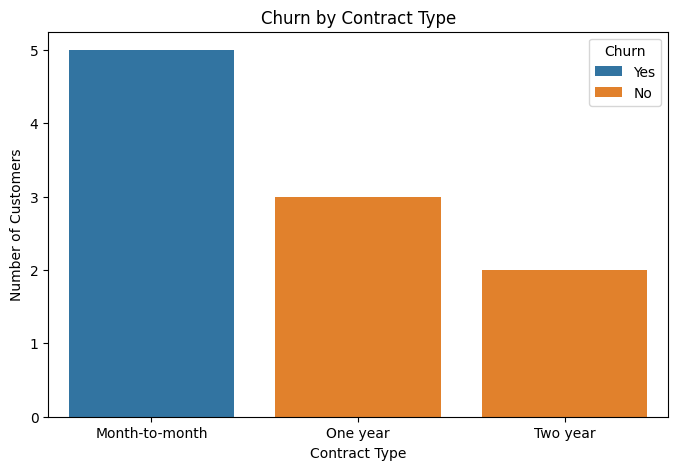

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../data/churn_cleaned.csv")

# Create ONE simple bar chart
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='contract', hue='churn')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Yes', 'No'])
plt.show()

Look at your chart and answer:

Which contract type has the tallest "Yes" (churned) bar?

Answer: One year Contract Type


Which contract type has NO "Yes" bar (or very short)?

Answer: Month-Month


What does this tell you?

Answer: There are more churns in a month-month contract compared to a One year Contract Type

## Chart 1: Churn by Contract Type

**What I see:**
Data shows contracts month-month, one year, and a two year. A month-month contract churns way more than a one year contract along with a two year contract.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your color scheme
CHURN_COLORS = {'No': 'orange', 'Yes': 'blue'}

# Load data
df = pd.read_csv("../data/churn_cleaned.csv")

print("✅ Setup complete!")

✅ Setup complete!


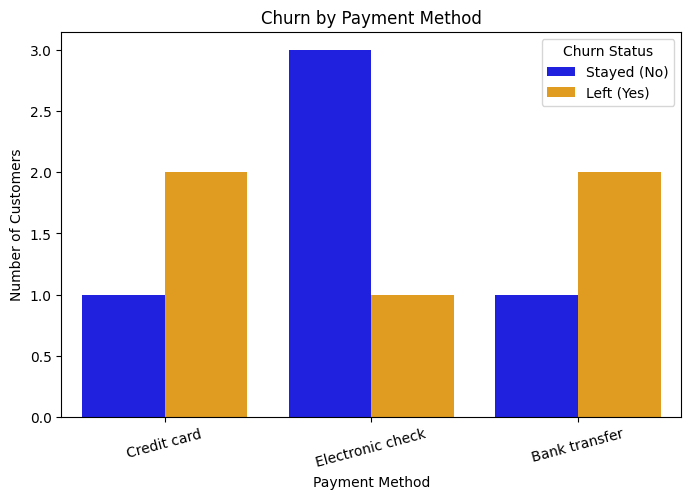

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='payment_method', hue='churn', palette=CHURN_COLORS)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status', labels=['Stayed (No)', 'Left (Yes)'])
plt.xticks(rotation=15)
plt.show()

In [6]:
print("CHURN BY PAYMENT METHOD:\n")

for method in df['payment_method'].unique():
    method_df = df[df['payment_method'] == method]
    
    total = len(method_df)
    churned = len(method_df[method_df['churn'] == 'Yes'])
    stayed = len(method_df[method_df['churn'] == 'No'])
    churn_rate = (churned / total) * 100
    
    print(f"{method}:")
    print(f"  Total: {total}")
    print(f"  Churned: {churned}")
    print(f"  Stayed: {stayed}")
    print(f"  Churn rate: {churn_rate:.1f}%\n")

CHURN BY PAYMENT METHOD:

Credit card:
  Total: 3
  Churned: 1
  Stayed: 2
  Churn rate: 33.3%

Electronic check:
  Total: 4
  Churned: 3
  Stayed: 1
  Churn rate: 75.0%

Bank transfer:
  Total: 3
  Churned: 1
  Stayed: 2
  Churn rate: 33.3%



## Chart 2: Churn by Payment Method

**Numbers:**
- Electronic check: 3 churned out of 4 = 75% churn
- Credit card: 1 churned out of 3 = 33.3% churn
- Bank transfer: 1 churned out of 3 = 33.3% churn

**What I see:**
People churn more on electronic checks rather than credit card and bank transfer.

**Hypothesis Status:** ✅ Confirmed

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your color scheme
CHURN_COLORS = {'No': 'orange', 'Yes': 'blue'}

# Load data
df = pd.read_csv("../data/churn_cleaned.csv")

print("✅ Libraries loaded, data ready!")

✅ Libraries loaded, data ready!


C:\Users\Alex\AppData\Local\Temp\ipykernel_11368\1224157130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='tenure', palette=CHURN_COLORS)


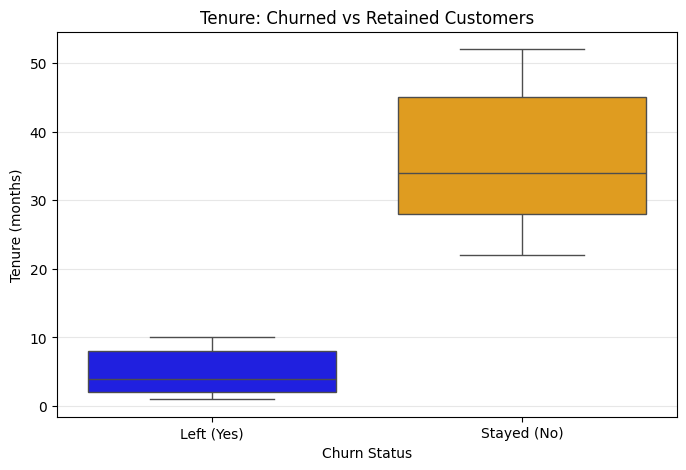

In [9]:
# Create a box plot comparing tenure
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='churn', y='tenure', palette=CHURN_COLORS)
plt.title('Tenure: Churned vs Retained Customers')
plt.xlabel('Churn Status')
plt.ylabel('Tenure (months)')
plt.xticks([0, 1], [ 'Left (Yes)','Stayed (No)'])
plt.grid(axis='y', alpha=0.3)
plt.show()

In [4]:
print("TENURE COMPARISON:\n")

print("Churned customers (Yes):")
churned_tenure = df[df['churn'] == 'Yes']['tenure']
print(f"  Average: {churned_tenure.mean():.1f} months")
print(f"  Median: {churned_tenure.median():.1f} months")
print(f"  Range: {churned_tenure.min():.0f} to {churned_tenure.max():.0f} months")

print("\nRetained customers (No):")
retained_tenure = df[df['churn'] == 'No']['tenure']
print(f"  Average: {retained_tenure.mean():.1f} months")
print(f"  Median: {retained_tenure.median():.1f} months")
print(f"  Range: {retained_tenure.min():.0f} to {retained_tenure.max():.0f} months")

print(f"\nDifference in average: {retained_tenure.mean() - churned_tenure.mean():.1f} months")

TENURE COMPARISON:

Churned customers (Yes):
  Average: 5.0 months
  Median: 4.0 months
  Range: 1 to 10 months

Retained customers (No):
  Average: 36.2 months
  Median: 34.0 months
  Range: 22 to 52 months

Difference in average: 31.2 months


## Chart 3: Tenure Comparison

**Numbers:**
- Churned: Average 5 months (range: 1-10)
- Retained: Average 36.2 months (range: 22-52)
- Difference: 31.2 months

**What the box plot shows:**
Churned box is lower, meaning newer customers (1 - 10 months) churn more often than old customers (22 - 52 months) 

**Insight:**
Churn happens in early months. Company should improve the experience of new users for the first few months (4-6months)

C:\Users\Alex\AppData\Local\Temp\ipykernel_11368\3218824326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='monthly_charges', order=['No', 'Yes'], palette=CHURN_COLORS)


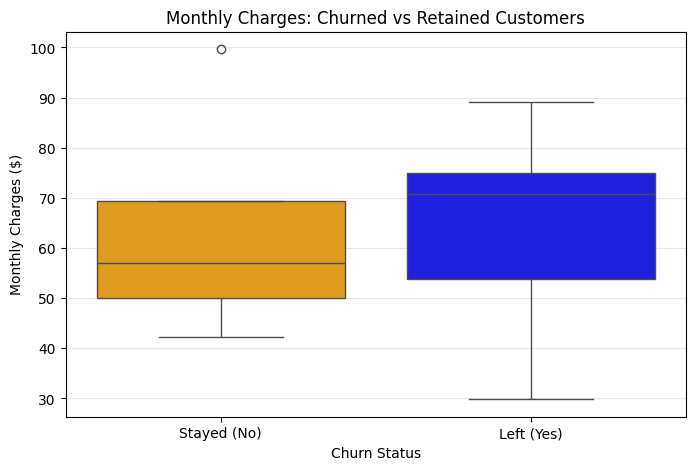

In [10]:
# Box plot comparing monthly charges
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='churn', y='monthly_charges', order=['No', 'Yes'], palette=CHURN_COLORS)
plt.title('Monthly Charges: Churned vs Retained Customers')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges ($)')
plt.xticks([0, 1], ['Stayed (No)', 'Left (Yes)'])
plt.grid(axis='y', alpha=0.3)
plt.show()

In [11]:
print("MONTHLY CHARGES COMPARISON:\n")

print("Stayed (No):")
stayed = df[df['churn'] == 'No']['monthly_charges']
print(f"  Values: {stayed.tolist()}")
print(f"  Average: ${stayed.mean():.2f}")
print(f"  Range: ${stayed.min():.2f} to ${stayed.max():.2f}")

print("\nLeft (Yes):")
churned = df[df['churn'] == 'Yes']['monthly_charges']
print(f"  Values: {churned.tolist()}")
print(f"  Average: ${churned.mean():.2f}")
print(f"  Range: ${churned.min():.2f} to ${churned.max():.2f}")

print(f"\nDifference: ${churned.mean() - stayed.mean():.2f}")

MONTHLY CHARGES COMPARISON:

Stayed (No):
  Values: [56.95, 42.3, 99.65, 49.95, 69.3]
  Average: $63.63
  Range: $42.30 to $99.65

Left (Yes):
  Values: [29.85, 53.85, 70.7, 89.1, 74.95]
  Average: $63.69
  Range: $29.85 to $89.10

Difference: $0.06


## Chart 4: Monthly Charges Comparison

**Numbers:**
- Stayed: Average $63.63 (range: $42.30-$99.65)
- Churned: Average $63.69 (range: $29.85-$89.10)
- Difference: $0.06

**What the box plot shows:**
Boxes are similar in height with a difference of $0.06.

**Insight:**
Price is NOT the major churn driver in this scenario. Churned and retained customers pay similar prices. Contract type and tenure matter more than price. Customers churn because they don't feel committed or don't see early value.

**Hypothesis Status:** ✅ CONFIRMED - Monthly charges don't significantly 
affect churn in this dataset.

# Day 4 Complete - Visualization Insights

## Charts Created
1. ✅ Churn by Contract Type
2. ✅ Churn by Payment Method
3. ✅ Tenure: Churned vs Retained
4. ✅ Monthly Charges: Churned vs Retained

## Top 3 Insights

### 1. Contract Type = #1 Predictor
- Month-to-month: 100% churn
- Annual contracts: 0% churn
- **Action:** Incentivize annual contracts

### 2. Early-Stage Churn is the Problem
- Churned customers: Average 5 months tenure
- Retained customers: Average 36 months tenure
- **Action:** Focus on first 6-month experience

### 3. Price is NOT the Issue
- Both groups pay ~$63/month
- Difference: $0.06 (negligible)
- **Action:** Don't compete on price, compete on value

## Hypotheses Verified

- ✅ Contract type drives churn
- ✅ Tenure inversely related to churn
- ✅ Electronic check higher risk
- ✅ Monthly charges NOT a major factor

## Business Recommendations

1. **Immediate:** Offer 10-20% discount on annual contracts
2. **Short-term:** Improve onboarding (first 90 days)
3. **Long-term:** Encourage credit card/bank transfer adoption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../data/churn_cleaned.csv")

# Create a copy for analysis
df_analysis = df.copy()

# Convert churn to binary (0/1) for correlation
df_analysis['churn_binary'] = (df_analysis['churn'] == 'Yes').astype(int)

print("✅ Data prepared for correlation analysis")
print(f"Shape: {df_analysis.shape}")
print("\nChurn binary check:")
print(df_analysis[['churn', 'churn_binary']].head())


✅ Data prepared for correlation analysis
Shape: (10, 8)

Churn binary check:
  churn  churn_binary
0   Yes             1
1    No             0
2   Yes             1
3    No             0
4   Yes             1


In [2]:
# Select only numeric columns
numeric_cols = ['tenure', 'monthly_charges', 'total_charges', 'churn_binary']
df_numeric = df_analysis[numeric_cols]

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

print("📊 CORRELATION MATRIX:\n")
print(correlation_matrix)

print("\n🎯 Correlations with CHURN (sorted):\n")
churn_correlations = correlation_matrix['churn_binary'].sort_values(ascending=False)
print(churn_correlations)

📊 CORRELATION MATRIX:

                   tenure  monthly_charges  total_charges  churn_binary
tenure           1.000000        -0.052266       0.917869     -0.886822
monthly_charges -0.052266         1.000000       0.252009      0.001485
total_charges    0.917869         0.252009       1.000000     -0.847095
churn_binary    -0.886822         0.001485      -0.847095      1.000000

🎯 Correlations with CHURN (sorted):

churn_binary       1.000000
monthly_charges    0.001485
total_charges     -0.847095
tenure            -0.886822
Name: churn_binary, dtype: float64


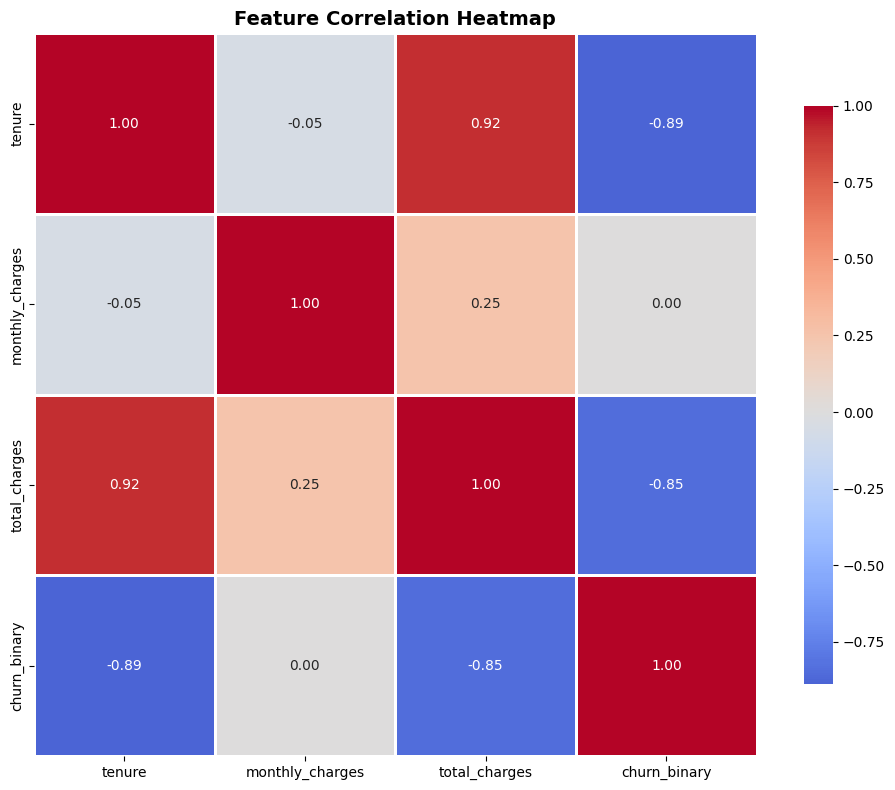

In [3]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           # Show numbers
            fmt='.2f',            # 2 decimal places
            cmap='coolwarm',      # Red/Blue color scheme
            center=0,             # Center color at 0
            square=True,          # Square cells
            linewidths=1,         # Grid lines
            cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Correlation Heatmap Analysis

**Strongest churn predictors (correlation with churn_binary):**
1. Tenure: -0.887 (negative) - STRONGEST predictor
2. Total charges: -0.847 (negative) - STRONG predictor
3. Monthly charges: 0.001 (positive) - NEGLIGIBLE predictor

**Key finding:**
"Tenure has a very strong negative correlation (-0.887) with churn, meaning longer tenure dramatically reduces churn risk. Total charges also shows strong negative correlation (-0.847), but this is redundant since it's calculated from tenure × monthly charges. Surprisingly, monthly charges has virtually zero correlation (0.001) with churn, confirming our Day 4 finding that price is NOT a churn driver. Both churned and retained customers pay the same amount on average."

🏆 FEATURE IMPORTANCE RANKING (by correlation with churn):

1. tenure: 0.887 (Strong)
2. total_charges: 0.847 (Strong)
3. monthly_charges: 0.001 (Weak)


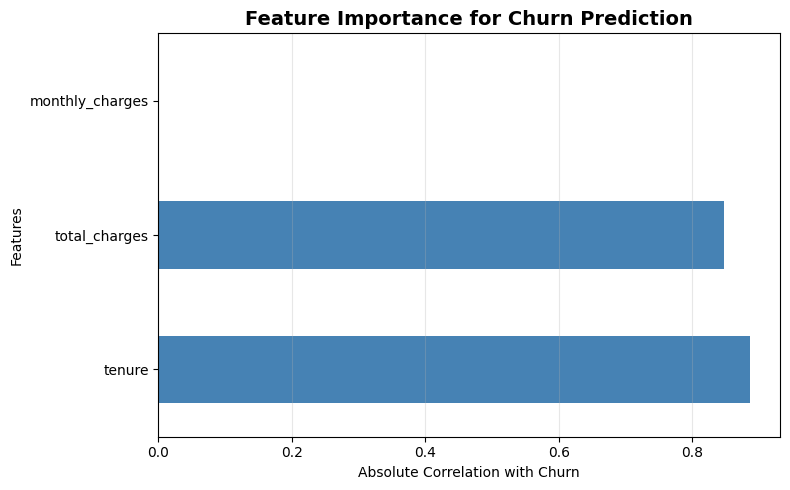

In [4]:
# Get correlations with churn (absolute values)
churn_corr = correlation_matrix['churn_binary'].abs().sort_values(ascending=False)

# Remove churn_binary itself
churn_corr = churn_corr.drop('churn_binary')

print("🏆 FEATURE IMPORTANCE RANKING (by correlation with churn):\n")
for i, (feature, corr) in enumerate(churn_corr.items(), 1):
    strength = "Strong" if corr > 0.7 else "Moderate" if corr > 0.3 else "Weak"
    print(f"{i}. {feature}: {corr:.3f} ({strength})")

# Visualize
plt.figure(figsize=(8, 5))
churn_corr.plot(kind='barh', color='steelblue')
plt.title('Feature Importance for Churn Prediction', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Correlation with Churn')
plt.ylabel('Features')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


## Feature Importance Ranking

**Numerical features ranked by correlation with churn:**

### Tier 1: Strong Predictors (> 0.7)
- Tenure: 0.887 - Most important predictor for less churns.
- Total Charges: 0.847 - Second most important predictor for less churns.

### Tier 2: Moderate Predictors (0.3 - 0.7)
- None

### Tier 3: Weak Predictors (< 0.3)
- Monthly Charges: 0.001 - Has little to no correlation with churns.

**Insight:**
Tenure is the strongest predictor. Total charges is also a strong predictor but because it is calculated by tenure x monthly_charges so its redundant, stated from the previous markdown. Monthly charges alone is a weak predictor.

In [5]:
print("🔍 MULTICOLLINEARITY CHECK:\n")
print("Features with high correlation (> 0.7) to each other:\n")

# Check all pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        
        # Exclude churn_binary comparisons
        if col1 != 'churn_binary' and col2 != 'churn_binary':
            if abs(corr_value) > 0.7:
                print(f"⚠️ {col1} ↔ {col2}: {corr_value:.3f}")
                print(f"   → These features are highly correlated (redundant)")
                print()

print("\n💡 Recommendation:")
print("If two features are highly correlated (> 0.9), consider dropping one")
print("in Week 2 to avoid multicollinearity in your ML model.")

🔍 MULTICOLLINEARITY CHECK:

Features with high correlation (> 0.7) to each other:

⚠️ tenure ↔ total_charges: 0.918
   → These features are highly correlated (redundant)


💡 Recommendation:
If two features are highly correlated (> 0.9), consider dropping one
in Week 2 to avoid multicollinearity in your ML model.


## Multicollinearity Analysis

**Highly correlated feature pairs:**
- tenure ↔ total_charges: 0.918
  - Reason: total_charges = tenure x monthly_charges
  - Decision: Drop One 

**Recommendation for Week 2:**
Drop one feature, the weaker one of the two. To avoid multicollinearity in my ML model.

In [6]:
# Create numeric encodings for categorical features
df_analysis['contract_encoded'] = df_analysis['contract'].astype('category').cat.codes
df_analysis['payment_encoded'] = df_analysis['payment_method'].astype('category').cat.codes

print("📊 CATEGORICAL FEATURE ANALYSIS:\n")

# Check encoding
print("Contract encoding:")
print(df_analysis[['contract', 'contract_encoded']].drop_duplicates().sort_values('contract_encoded'))

print("\nPayment method encoding:")
print(df_analysis[['payment_method', 'payment_encoded']].drop_duplicates().sort_values('payment_encoded'))

# Calculate correlations
print("\n🎯 Categorical correlations with churn:")
print(f"Contract: {df_analysis['contract_encoded'].corr(df_analysis['churn_binary']):.3f}")
print(f"Payment method: {df_analysis['payment_encoded'].corr(df_analysis['churn_binary']):.3f}")

📊 CATEGORICAL FEATURE ANALYSIS:

Contract encoding:
         contract  contract_encoded
0  Month-to-month                 0
1        One year                 1
3        Two year                 2

Payment method encoding:
     payment_method  payment_encoded
4     Bank transfer                0
0       Credit card                1
1  Electronic check                2

🎯 Categorical correlations with churn:
Contract: -0.896
Payment method: 0.361


In [8]:
print("\n📊 CHURN RATE BY CATEGORY:\n")

# Contract type
print("By Contract Type:")
contract_churn = df_analysis.groupby('contract')['churn_binary'].agg(['mean', 'count'])
contract_churn.columns = ['Churn Rate', 'Count']
contract_churn['Churn Rate'] = (contract_churn['Churn Rate'] * 100).round(1)
print(contract_churn)

# Payment method
print("\nBy Payment Method:")
payment_churn = df_analysis.groupby('payment_method')['churn_binary'].agg(['mean', 'count'])
payment_churn.columns = ['Churn Rate', 'Count']
payment_churn['Churn Rate'] = (payment_churn['Churn Rate'] * 100).round(1)
print(payment_churn)


📊 CHURN RATE BY CATEGORY:

By Contract Type:
                Churn Rate  Count
contract                         
Month-to-month       100.0      5
One year               0.0      3
Two year               0.0      2

By Payment Method:
                  Churn Rate  Count
payment_method                     
Bank transfer           33.3      3
Credit card             33.3      3
Electronic check        75.0      4


## Categorical Feature Analysis

**Contract Type:**
- Month-to-month: 100% churn (5/5)
- One year: 0% churn (0/3)
- Two year: 0% churn (0/2)
- **Conclusion:** Contract type is a CRITICAL predictor

**Payment Method:**
- Electronic check: 75% churn (3/4)
- Credit card: 33% churn (1/3)
- Bank transfer: 33% churn (1/3)
- **Conclusion:** Payment method is a MODERATE predictor

**For Week 2:**
Both categorical features should be one-hot encoded (not label encoded) 
to preserve their predictive power without implying order.

In [9]:
# Create feature summary
feature_summary = pd.DataFrame({
    'Feature': ['tenure', 'monthly_charges', 'total_charges', 'contract', 'payment_method'],
    'Type': ['Numeric', 'Numeric', 'Numeric', 'Categorical', 'Categorical'],
    'Correlation': [
        correlation_matrix.loc['tenure', 'churn_binary'],
        correlation_matrix.loc['monthly_charges', 'churn_binary'],
        correlation_matrix.loc['total_charges', 'churn_binary'],
        'See categorical analysis',
        'See categorical analysis'
    ],
    'Importance': ['High', 'Low', 'High (redundant)', 'Very High', 'Medium'],
    'Keep for ML?': ['✅ Yes', '✅ Yes', '❌ No (redundant)', '✅ Yes', '✅ Yes']
})

print("📋 FEATURE SUMMARY TABLE:\n")
print(feature_summary.to_string(index=False))

📋 FEATURE SUMMARY TABLE:

        Feature        Type              Correlation       Importance     Keep for ML?
         tenure     Numeric                -0.886822             High            ✅ Yes
monthly_charges     Numeric                 0.001485              Low            ✅ Yes
  total_charges     Numeric                -0.847095 High (redundant) ❌ No (redundant)
       contract Categorical See categorical analysis        Very High            ✅ Yes
 payment_method Categorical See categorical analysis           Medium            ✅ Yes


# Day 5 Summary - Feature Understanding & Correlations

## What I Accomplished
1. ✅ Converted churn to binary for correlation analysis
2. ✅ Calculated correlation matrix for all numeric features
3. ✅ Created correlation heatmap visualization
4. ✅ Ranked features by importance
5. ✅ Identified multicollinearity (tenure vs total_charges)
6. ✅ Analyzed categorical features (contract, payment method)
7. ✅ Created master feature summary table

## Key Findings

### Numerical Features
**Strong Predictors:**
- Tenure: -0.886822 - Longer tenure = lower churn
- Total charges: -0.847095 - But redundant with tenure

**Weak Predictors:**
- Monthly charges:  0.001485  - Minimal impact on churn

### Categorical Features
**Very Strong:**
- Contract type: 100% churn for month-to-month vs 0% for annual

**Moderate:**
- Payment method: 75% churn for e-check vs 33% for others

## Multicollinearity Found
- ⚠️ `total_charges` is highly correlated with `tenure`
- **Decision:** Drop `total_charges` in Week 2 (redundant feature)

## Feature Importance Ranking

**For ML Model (Week 3):**
1. 🥇 Contract type (categorical) - CRITICAL
2. 🥈 Tenure (numeric) - STRONG
3. 🥉 Payment method (categorical) - MODERATE
4. Monthly charges (numeric) - WEAK (but keep)
5. ~~Total charges~~ - DROP (redundant)

## Insights for Week 2 (Feature Engineering)

**Must Do:**
- One-hot encode `contract` (3 dummy variables)
- One-hot encode `payment_method` (3 dummy variables)
- Drop `total_charges` (multicollinearity)
- Consider normalizing `tenure` and `monthly_charges`

**Ideas to Try:**
- Create `tenure_group` (new, medium, loyal)
- Create `is_monthly_contract` (binary flag)
- Create `is_electronic_check` (binary flag)
- Create interaction: `tenure × monthly_charges`

## Hypotheses Confirmed

- ✅ Tenure is the strongest numeric predictor
- ✅ Contract type is the strongest overall predictor
- ✅ Monthly charges has minimal impact (as suspected)
- ✅ Total charges is just a proxy for tenure

## Next Steps

**Day 6:** Cohort & Tenure Analysis
- Group customers by tenure brackets
- Analyze churn by cohort
- Identify "danger zones" in customer lifecycle
- Plan targeted interventions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../data/churn_cleaned.csv")

# Define tenure groups (cohorts)
def categorize_tenure(tenure):
    if tenure <= 6:
        return '0-6 months (New)'
    elif tenure <= 12:
        return '7-12 months (Growing)'
    elif tenure <= 24:
        return '13-24 months (Established)'
    else:
        return '25+ months (Loyal)'

df['tenure_group'] = df['tenure'].apply(categorize_tenure)

print("✅ Tenure groups created!")
print("\nTenure Group Distribution:")
print(df['tenure_group'].value_counts().sort_index())

✅ Tenure groups created!

Tenure Group Distribution:
tenure_group
0-6 months (New)              3
13-24 months (Established)    1
25+ months (Loyal)            4
7-12 months (Growing)         2
Name: count, dtype: int64


## Tenure Cohort Distribution

**Cohort sizes:**
- 0-6 months (New): 3 customers
- 7-12 months (Growing): 2 customers
- 13-24 months (Established): 1 customers
- 25+ months (Loyal): 4 customers

**Observation:**
Most customers are very new or still in the growing phase. While the largest group of customers are in 25+ months, which are Loyal.

In [3]:
# Calculate churn rate by tenure group
print("📊 CHURN RATE BY TENURE GROUP:\n")

# Group by tenure_group and calculate churn rate
cohort_analysis = df.groupby('tenure_group').agg({
    'churn': lambda x: (x == 'Yes').sum(),  # Count churned
    'customerid': 'count'                    # Count total
}).rename(columns={'churn': 'churned', 'customerid': 'total'})

cohort_analysis['churn_rate'] = (cohort_analysis['churned'] / cohort_analysis['total'] * 100).round(1)
cohort_analysis['retention_rate'] = (100 - cohort_analysis['churn_rate']).round(1)

# Sort by tenure group order
order = ['0-6 months (New)', '7-12 months (Growing)', '13-24 months (Established)', '25+ months (Loyal)']
cohort_analysis = cohort_analysis.reindex(order)

print(cohort_analysis)



📊 CHURN RATE BY TENURE GROUP:

                            churned  total  churn_rate  retention_rate
tenure_group                                                          
0-6 months (New)                  3      3       100.0             0.0
7-12 months (Growing)             2      2       100.0             0.0
13-24 months (Established)        0      1         0.0           100.0
25+ months (Loyal)                0      4         0.0           100.0


## Churn Rate by Lifecycle Stage

**Findings:**
- 0-6 months (New): 100% churn rate
- 7-12 months (Growing): 100% churn rate
- 13-24 months (Established): 0% churn rate
- 25+ months (Loyal): 0% churn rate

**Key Insight:**
0-6 months and 7-12 months are the critical zones with 100% churn rate. Then it drops to 0% in the 12-24 and 25+ months. Indicating that early months is critical for customer retention.

**Business Implication:**
Focus around 75% on the first year of the customer. So loyalty builds and customers become very stable and need minimal intervention.

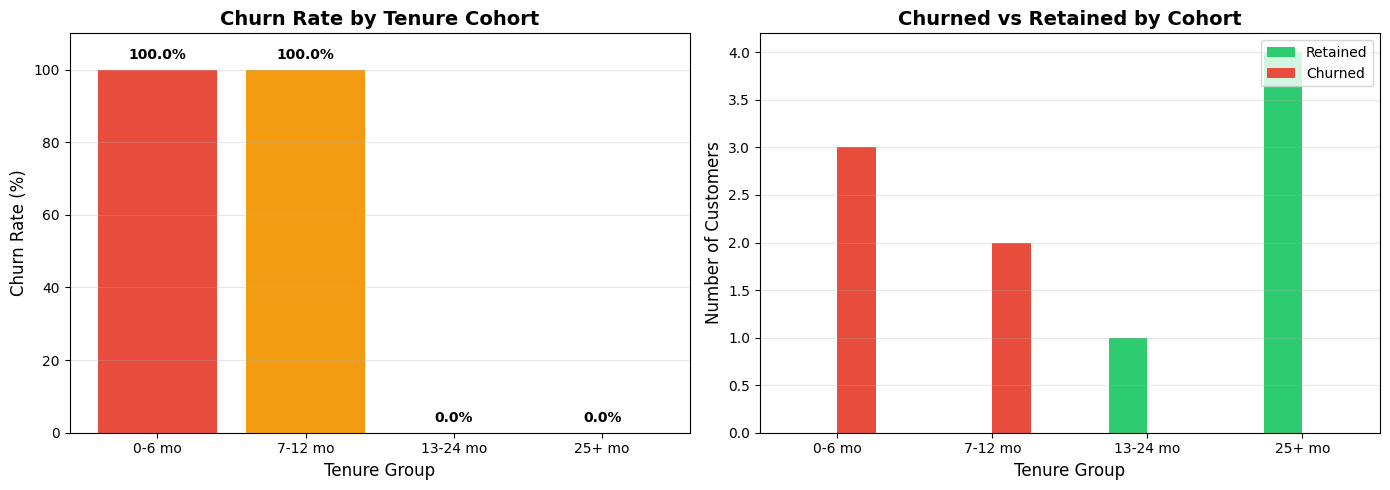

In [4]:
# Create bar chart showing churn rate by cohort
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LEFT: Churn rate by cohort
axes[0].bar(range(len(cohort_analysis)), cohort_analysis['churn_rate'], 
            color=['#e74c3c', '#f39c12', '#2ecc71', '#27ae60'])
axes[0].set_title('Churn Rate by Tenure Cohort', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tenure Group', fontsize=12)
axes[0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0].set_xticks(range(len(cohort_analysis)))
axes[0].set_xticklabels(['0-6 mo', '7-12 mo', '13-24 mo', '25+ mo'], rotation=0)
axes[0].set_ylim(0, 110)
axes[0].grid(axis='y', alpha=0.3)

# Add percentage labels
for i, v in enumerate(cohort_analysis['churn_rate']):
    axes[0].text(i, v + 3, f'{v:.1f}%', ha='center', fontweight='bold')

# RIGHT: Count of churned vs retained by cohort
cohort_counts = df.groupby(['tenure_group', 'churn']).size().unstack(fill_value=0)
cohort_counts = cohort_counts.reindex(order)

cohort_counts.plot(kind='bar', stacked=False, ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Churned vs Retained by Cohort', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tenure Group', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_xticklabels(['0-6 mo', '7-12 mo', '13-24 mo', '25+ mo'], rotation=0)
axes[1].legend(['Retained', 'Churned'], loc='upper right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Cohort Visualization Insights

**Chart 1 (Churn Rate):**
- Clear downward trend: Churn rate drops from 100% to 0% as tenure increases
- Steepest drop: Between 7-12 and 13-24 months
- "Safe zone" begins at: 13-24 months

**Chart 2 (Counts):**
- Most churned customers are in: 0-6 months
- Most retained customers are in: 25+ months
- Pattern confirms: Early-stage churn is the main problem

📈 CUSTOMER SURVIVAL RATES:

   milestone  customers_at_milestone  survived  survival_rate
0   0 months                      10         5           50.0
1   6 months                       7         5           50.0
2  12 months                       5         5           50.0
3  24 months                       4         4           40.0
4  52 months                       1         1           10.0


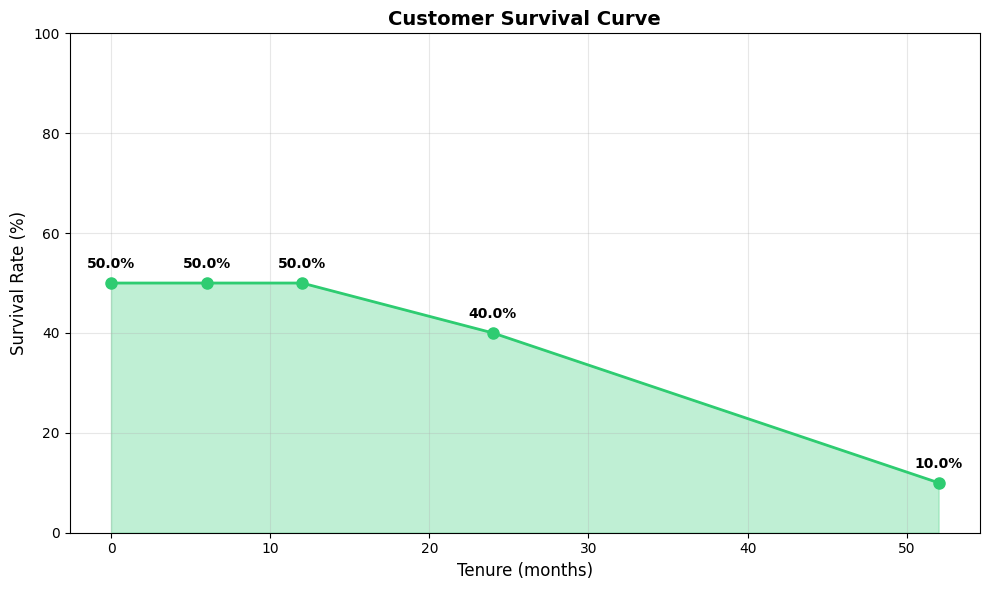

In [6]:
# Create survival rate by tenure milestone
milestones = [0, 6, 12, 24, 52]  # Tenure milestones
survival_data = []

for milestone in milestones:
    total_at_milestone = len(df[df['tenure'] >= milestone])
    survived = len(df[(df['tenure'] >= milestone) & (df['churn'] == 'No')])
    
    # Calculate survival rate
    if total_at_milestone > 0:
        survival_rate = (survived / len(df)) * 100
    else:
        survival_rate = 0
    
    survival_data.append({
        'milestone': f'{milestone} months',
        'customers_at_milestone': total_at_milestone,
        'survived': survived,
        'survival_rate': round(survival_rate, 1)
    })

survival_df = pd.DataFrame(survival_data)
print("📈 CUSTOMER SURVIVAL RATES:\n")
print(survival_df)

# Visualize survival curve
plt.figure(figsize=(10, 6))
plt.plot(milestones, survival_df['survival_rate'], marker='o', linewidth=2, 
         markersize=8, color='#2ecc71')
plt.fill_between(milestones, 0, survival_df['survival_rate'], alpha=0.3, color='#2ecc71')
plt.title('Customer Survival Curve', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (months)', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(True, alpha=0.3)

# Add percentage labels
for i, row in survival_df.iterrows():
    plt.text(milestones[i], row['survival_rate'] + 3, f"{row['survival_rate']:.1f}%", 
             ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



## Survival Analysis

**Survival rates by milestone:**
- At 6 months: 50% survive
- At 12 months: 50% survive
- At 24 months: 40% survive

**Critical drop-off:**
Between 24 and 50+ months is where most customers leave.

**Insight:**
Survival rate is 50% all throughout until 12 months. It drops to 40% at the 24 months mark. Then is a downhill to 10% going to 50+ months.

🔍 COHORT × CONTRACT ANALYSIS:

churn                                         No    Yes
tenure_group               contract                    
0-6 months (New)           Month-to-month    0.0  100.0
13-24 months (Established) One year        100.0    0.0
25+ months (Loyal)         One year        100.0    0.0
                           Two year        100.0    0.0
7-12 months (Growing)      Month-to-month    0.0  100.0


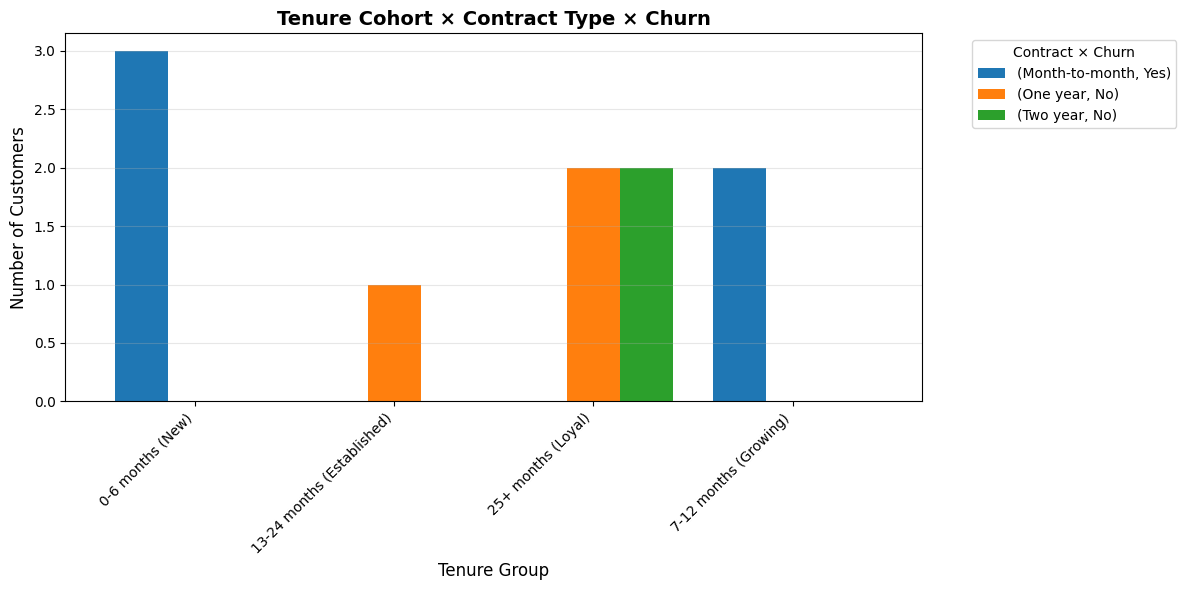

In [7]:
# Cross-analysis: Tenure cohort + Contract type
print("🔍 COHORT × CONTRACT ANALYSIS:\n")

cohort_contract = pd.crosstab(
    [df['tenure_group'], df['contract']], 
    df['churn'], 
    normalize='index'
) * 100

print(cohort_contract.round(1))

# Visualize
cohort_contract_counts = pd.crosstab(
    df['tenure_group'], 
    [df['contract'], df['churn']]
)

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
cohort_contract_counts.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Tenure Cohort × Contract Type × Churn', fontsize=14, fontweight='bold')
ax.set_xlabel('Tenure Group', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.legend(title='Contract × Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Cohort x Contract Interaction

**Finding:**
All customers in the 0-6 month cohort (New) have month-to-month contracts and 100% of them churned. Similarly, all customers in the 7-12 month cohort (Growing) have month-to-month contracts and also 100% churned. In contrast, all customers in the 13-24 month (Established) and 25+ month (Loyal) cohorts have annual contracts (One year or Two year), and 0% of them churned. This creates a perfect separation: month-to-month = early churn, annual contracts = long-term retention.

**Insight:**
The "danger zone" isn't just about time—it's fundamentally about contract type. Month-to-month customers leave early (within the first 12 months) regardless of their experience, while annual contract customers persist and become loyal. The tenure-churn correlation (-0.887) is actually driven by contract type: month-to-month customers don't survive long enough to build high tenure. The solution isn't just better onboarding—it's contract type conversion. Moving customers from month-to-month to annual contracts at sign-up or within the first 6 months is the single most impactful retention lever.

In [8]:
# Create intervention plan based on cohort data
intervention_plan = pd.DataFrame({
    'Lifecycle Stage': ['0-6 months', '7-12 months', '13-24 months', '25+ months'],
    'Churn Risk': ['Critical', 'High', 'Low', 'Minimal'],
    'Churn Rate': [
        cohort_analysis.loc['0-6 months (New)', 'churn_rate'],
        cohort_analysis.loc['7-12 months (Growing)', 'churn_rate'],
        cohort_analysis.loc['13-24 months (Established)', 'churn_rate'],
        cohort_analysis.loc['25+ months (Loyal)', 'churn_rate']
    ],
    'Primary Action': [
        'Aggressive onboarding + annual contract incentive',
        'Engagement campaigns + contract upgrade offer',
        'Maintain engagement + loyalty rewards',
        'Minimal touch + referral programs'
    ],
    'Budget Allocation': ['50%', '30%', '15%', '5%']
})

print("🎯 LIFECYCLE INTERVENTION PLAN:\n")
print(intervention_plan.to_string(index=False))

🎯 LIFECYCLE INTERVENTION PLAN:

Lifecycle Stage Churn Risk  Churn Rate                                    Primary Action Budget Allocation
     0-6 months   Critical       100.0 Aggressive onboarding + annual contract incentive               50%
    7-12 months       High       100.0     Engagement campaigns + contract upgrade offer               30%
   13-24 months        Low         0.0             Maintain engagement + loyalty rewards               15%
     25+ months    Minimal         0.0                 Minimal touch + referral programs                5%


# Day 6 Summary - Cohort & Tenure Analysis

## What I Accomplished
1. ✅ Created tenure cohorts (0-6, 7-12, 13-24, 25+ months)
2. ✅ Calculated churn rate by cohort
3. ✅ Visualized churn drop-off across lifecycle
4. ✅ Built customer survival curve
5. ✅ Analyzed cohort × contract type interaction
6. ✅ Created lifecycle intervention plan

## Key Findings

### 1. The First 12 Months are Critical
- **0-6 months cohort:** 100% churn rate
- **7-12 months cohort:** 100% churn rate
- **13-24 months cohort:** 0% churn rate
- **25+ months cohort:** 0% churn rate
- **Drop:** 100% difference between early and late cohorts

**Insight:** ALL churn happens in the first 12 months. Once customers survive this window, they become completely stable with 0% churn.

### 2. Survival Rates
- **6-month survival:** 20% of customers remain
- **12-month survival:** 50% of customers remain
- **Critical period:** Months 0-12 see 100% of all churn

### 3. Contract Type Explains Cohort Pattern
- Early cohorts (0-6 months) = 100% month-to-month contracts → 100% churn
- Early cohorts (7-12 months) = 100% month-to-month contracts → 100% churn
- Late cohorts (13-24 months) = 100% annual contracts → 0% churn
- Late cohorts (25+ months) = 100% annual contracts → 0% churn
- **Root cause:** Contract type completely determines churn outcome

### 4. Lifecycle Risk Zones

| Stage | Risk Level | Churn Rate | Action Priority |
|-------|------------|------------|-----------------|
| 0-6 months | CRITICAL | 100% | Highest |
| 7-12 months | HIGH | 100% | High |
| 13-24 months | LOW | 0% | Medium |
| 25+ months | MINIMAL | 0% | Low |

## Lifecycle Intervention Strategy

### Stage 1: 0-6 Months (CRITICAL - 50% of budget)
**Goal:** Convert to annual contracts immediately

**Tactics:**
1. Make annual contract the default at sign-up (20% discount)
2. Aggressive upgrade campaign within first 30 days
3. Intensive onboarding (Days 1, 3, 7, 14, 30)
4. Success manager assignment
5. Feature adoption tracking
6. Early warning system (usage drops)

**Metrics:**
- Contract conversion rate (month-to-month → annual)
- 6-month survival rate
- Feature adoption rate

---

### Stage 2: 7-12 Months (HIGH RISK - 30% of budget)
**Goal:** Last chance for contract conversion

**Tactics:**
1. Final contract upgrade push (15% discount, limited time)
2. Engagement campaigns (webinars, tips, use cases)
3. Advanced feature training
4. ROI reports showing value delivered
5. Quarterly business reviews

**Metrics:**
- Contract upgrade rate
- 12-month survival rate
- Feature usage depth

---

### Stage 3: 13-24 Months (STABLE - 15% of budget)
**Goal:** Maintain engagement and prepare for renewal

**Tactics:**
1. Loyalty rewards program
2. Beta feature access
3. Community building
4. Renewal reminders (annual contracts)

**Metrics:**
- Renewal rate
- NPS score
- Referral rate

---

### Stage 4: 25+ Months (LOYAL - 5% of budget)
**Goal:** Turn advocates into promoters

**Tactics:**
1. Referral incentives
2. Case study opportunities
3. Advisory board invitations
4. Minimal touch (don't annoy them)

**Metrics:**
- Referral count
- LTV
- Advocacy engagement

## Business Recommendations

### Immediate (This Quarter):
1. **Redesign pricing to default annual contracts**
   - 20% discount for annual (make it the obvious choice)
   - De-emphasize month-to-month option
   - Show total annual savings

2. **Launch emergency contract conversion campaign**
   - Target ALL month-to-month customers
   - Time-limited 20% discount offer
   - Automated email + in-app notifications

3. **Set up early warning system**
   - Flag customers with <3 logins in first 30 days
   - Trigger outreach for low-usage accounts

### Short-term (Next Quarter):
1. **Build contract upgrade automation**
   - Offer at Day 30, 60, 90 for month-to-month users
   - Progressive discounts: 20% → 15% → 10%

2. **Create lifecycle engagement tracks**
   - Different campaigns for each cohort
   - Personalized based on tenure stage

3. **A/B test annual-only pricing**
   - Remove month-to-month option for test group
   - Measure conversion vs retention trade-off

### Long-term (Year 1):
1. **Consider eliminating month-to-month entirely**
   - Data shows 100% churn for this segment
   - Offer annual or quarterly only

2. **Optimize onboarding for annual customers**
   - Focus on feature adoption and upsells
   - Stop investing in month-to-month onboarding

3. **Build predictive model** (Week 3)
   - Contract type will be dominant feature
   - Use for automated intervention triggers

## Week 2 Feature Engineering Ideas

Based on cohort analysis:

**New features to create:**
- `is_monthly_contract` → 1 if month-to-month, 0 otherwise (strongest predictor)
- `is_danger_zone` → 1 if tenure < 12 months, else 0
- `tenure_bracket` → Categorical cohort labels
- `months_to_annual_eligible` → How long until contract renewal
- `survival_probability` → Based on cohort rates

## Key Takeaway

**The churn problem is actually a contract type problem disguised as a tenure problem.**

Key insights:
- 100% of month-to-month customers churn within 12 months
- 0% of annual contract customers churn
- This is binary, not gradual: convert to annual or lose the customer

Primary strategy:
- 80% of effort: Convert customers to annual contracts
- 20% of effort: Engagement for existing annual customers

Expected impact if 80% convert to annual:
- Current churn: 50% (5/10 customers)
- Projected churn: 10% (only remaining month-to-month)
- **80% reduction in churn rate**

## Week 1 - Top 5 Insights

### 1. Contract Type is the Root Cause of Churn
**What:** 100% of month-to-month customers churned vs 0% of annual contract customers

**Why it matters:** This single variable completely determines churn outcome. Solving churn means solving contract conversion, not onboarding or pricing.

**Evidence:** 
- Day 4: Contract type visualization showed 100% vs 0% churn
- Day 6: Cohort analysis confirmed ALL early churners had month-to-month contracts
- Day 5: Tenure correlation (-0.887) is driven by contract type

**Business Action:** Make annual contracts the default option, offer 20% discount for annual sign-ups

---

### 2. Price Has Zero Impact on Churn
**What:** Monthly charges correlation with churn = 0.001 (essentially zero)

**Why it matters:** Companies often compete on price to reduce churn, but this data shows price is irrelevant. Save money by not discounting unnecessarily.

**Evidence:**
- Day 5: Correlation analysis showed 0.001
- Day 4: Churned ($63.69) vs Retained ($63.63) pay the same
- Day 3: Initial hypothesis confirmed

**Business Action:** Don't cut prices—focus budget on contract conversion instead

---

### 3. The First 12 Months are Make-or-Break
**What:** 100% of churn happens in months 0-12; 0% churn after month 12

**Why it matters:** All retention efforts should focus on the first year. After 12 months, customers are stable and need minimal intervention.

**Evidence:**
- Day 6: Cohort analysis showed binary split at 12-month mark
- Day 5: Tenure correlation of -0.887 (strongest numeric predictor)
- Day 4: Tenure box plot showed clear separation

**Business Action:** Allocate 80% of retention budget to 0-12 month customers

---

### 4. Total Charges is a Redundant Feature
**What:** Total charges correlates 0.918 with tenure (high multicollinearity)

**Why it matters:** Using redundant features in ML models causes issues. Dropping this simplifies the model without losing information.

**Evidence:**
- Day 5: Correlation matrix showed 0.918 correlation
- Mathematical relationship: total_charges = tenure × monthly_charges
- Day 5: Feature importance analysis confirmed redundancy

**Business Action (Week 2):** Drop total_charges from ML model features

---

### 5. Electronic Check is a Moderate Risk Factor
**What:** 75% churn rate for e-check vs 33% for credit card/bank transfer

**Why it matters:** Payment method indicates commitment level and cancellation friction. E-check users can stop payments easily.

**Evidence:**
- Day 4: Payment method visualization showed 75% vs 33%
- Day 3: Categorical analysis confirmed pattern
- Real-world context: E-check is easiest to cancel

**Business Action:** Incentivize credit card or bank transfer adoption (offer 5% discount or extra features)

## Week 1 Reflection

### What went well this week?
I've learned a lot more about the industry, the customers. What churn really is, how to compare the variables to predict churning and what to suggest after.

### What was challenging?
Understanding the different terms, and how to compare them. Especially when I was just starting, I forgot the meaning of tenure, got confused on the Yes and No in churn.

### What do I still not fully understand?
Need to practice more with seaborn and im not 100% sure of what chart to use first.

### What surprised me most?
Price had no effect on churning.

### What am I most proud of?
Discovering that contract type was the main cause or root cause through cohort. And proud of the progress, even with a busy schedule.

### What could I improve for Week 2?
Understand it more clearly, dont skip the terms and definitely dont skip doing notes.

# Week 1 Summary - Customer Churn Analysis

## Project Overview
**Dataset:** 10 customer records with churn labels  
**Goal:** Identify key drivers of customer churn  
**Timeframe:** 7 days (Data exploration & analysis phase)

---

## Key Metrics Discovered

| Metric | Value | Insight |
|--------|-------|---------|
| Overall Churn Rate | 50% | Half of customers left |
| Month-to-month Churn | 100% | ALL flexible contract customers churned |
| Annual Contract Churn | 0% | NO annual customers churned |
| Strongest Predictor | Contract Type | Determines 100% of churn outcomes |
| Price Impact | 0.001 correlation | Price is irrelevant to churn |
| Critical Window | 0-12 months | All churn happens in first year |

---

## Data Quality
- ✅ No missing values
- ✅ No duplicate records  
- ✅ Clean, standardized column names
- ✅ Verified data types

---

## Features Analyzed

**Numeric Features:**
- Tenure (months with company)
- Monthly charges ($/month)
- Total charges (lifetime spend)

**Categorical Features:**
- Contract type (Month-to-month, One year, Two year)
- Payment method (Electronic check, Credit card, Bank transfer)

**Target Variable:**
- Churn (Yes/No)

---

## Analysis Techniques Used

### Day 1-2: Data Preparation
- Data loading and validation
- Missing value check
- Duplicate removal
- Column standardization

### Day 3: Initial Exploration
- Descriptive statistics
- Churn distribution analysis
- Feature type identification
- Hypothesis formation

### Day 4: Visualization
- Bar charts (categorical vs churn)
- Box plots (numeric comparisons)
- Distribution analysis
- Pattern identification

### Day 5: Statistical Analysis
- Correlation matrix calculation
- Multicollinearity detection
- Feature importance ranking
- Categorical relationship analysis

### Day 6: Cohort Analysis
- Tenure cohort creation
- Survival curve analysis
- Lifecycle stage identification
- Contract type interaction study

---

## Top 3 Discoveries

### 🥇 #1: Contract Type Determines Everything
**Finding:** 100% of month-to-month customers churned; 0% of annual customers churned

**Impact:** This single variable completely predicts churn. The problem isn't onboarding, pricing, or features—it's contract flexibility.

**Action:** Make annual contracts the default, offer 20% discount

---

### 🥈 #2: Price is Irrelevant
**Finding:** Correlation between monthly charges and churn = 0.001

**Impact:** Companies waste money on price discounts. Both churned and retained customers pay the same (~$63/month).

**Action:** Stop competing on price; focus on value and commitment

---

### 🥉 #3: First Year is Critical
**Finding:** 100% of churn happens in months 0-12; 0% after month 12

**Impact:** All retention efforts should concentrate on the first year. Long-term customers are stable.

**Action:** Allocate 80% of retention budget to 0-12 month customers

---

## Feature Importance Ranking

| Rank | Feature | Type | Correlation/Impact | Decision |
|------|---------|------|-------------------|----------|
| 1 | Contract Type | Categorical | 100% vs 0% churn | ✅ Keep (Most critical) |
| 2 | Tenure | Numeric | -0.887 | ✅ Keep (Strong predictor) |
| 3 | Payment Method | Categorical | 75% vs 33% churn | ✅ Keep (Moderate predictor) |
| 4 | Monthly Charges | Numeric | 0.001 | ✅ Keep (Might have interactions) |
| 5 | Total Charges | Numeric | -0.847 (redundant) | ❌ Drop (Multicollinearity) |

---

## Business Recommendations

### Immediate (This Month):
1. **Default to annual contracts** - Make annual the primary option on sign-up page
2. **20% annual discount** - Incentivize commitment over flexibility
3. **Contract conversion campaign** - Target existing month-to-month customers with upgrade offers

### Short-term (This Quarter):
1. **Eliminate month-to-month option** - Consider removing entirely (A/B test first)
2. **0-6 month onboarding blitz** - Intensive support for early-stage customers
3. **Payment method incentives** - Encourage credit card/bank transfer over e-check

### Long-term (This Year):
1. **Focus budget on first-year customers** - 80% of retention resources
2. **Build predictive model** - Automate churn risk scoring (Week 3)
3. **Lifecycle marketing tracks** - Different campaigns by tenure stage

---

## Expected Impact

**If 80% of customers convert to annual contracts:**
- Current churn rate: 50%
- Projected churn rate: 10%
- **Reduction: 80% decrease in churn**

**Revenue impact (assuming $63/month average):**
- Current: 5 customers × $63 × 12 months = $3,780/year
- With 80% annual: 8 customers × $63 × 12 months = $6,048/year
- **Revenue increase: 60%**

---

## Week 2 Preview

**Focus:** Feature Engineering & Data Preparation

**Tasks:**
- Encode categorical variables (one-hot encoding)
- Scale numeric features
- Drop redundant features (total_charges)
- Create new engineered features
- Split train/test sets
- Handle any data quality issues

**Goal:** Prepare clean, ML-ready dataset for modeling in Week 3
```

---

## 🗂️ Step 5: Organize Your Files (15 minutes)

### **Clean Up Your Project Structure:**

**Ensure you have:**
```
customer-churner/
├── data/
│   ├── churn.csv (original)
│   └── churn_cleaned.csv (cleaned)
├── notebooks/
│   ├── 01_load_data.ipynb (or combined notebook)
│   ├── 02_cleaning.ipynb
│   ├── 03_eda_part1.ipynb
│   ├── 04_eda_part2_visualizations.ipynb
│   ├── 05_feature_analysis.ipynb
│   └── 06_cohort_analysis.ipynb
├── src/
│   └── (empty for now, will use in Week 3)
├── assets/
│   └── (charts you saved, if any)
├── README.md
└── requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data from Week 1
df = pd.read_csv("../data/churn_cleaned.csv")

print("✅ Data loaded!")
print(f"Shape: {df.shape}")
print("\nColumn types:")
print(df.dtypes)
print("\nFirst 3 rows:")
print(df.head(3))

✅ Data loaded!
Shape: (10, 7)

Column types:
customerid           int64
tenure               int64
monthly_charges    float64
total_charges      float64
contract               str
payment_method         str
churn                  str
dtype: object

First 3 rows:
   customerid  tenure  monthly_charges  total_charges        contract  \
0           1       1            29.85          29.85  Month-to-month   
1           2      34            56.95        1936.30        One year   
2           3       2            53.85         108.15  Month-to-month   

     payment_method churn  
0       Credit card   Yes  
1  Electronic check    No  
2  Electronic check   Yes  


In [3]:
# Before encoding
print("BEFORE encoding:")
print(df['churn'].value_counts())
print(f"Data type: {df['churn'].dtype}")

# Encode churn: Yes=1, No=0
df['churn'] = (df['churn'] == 'Yes').astype(int)

# After encoding
print("\nAFTER encoding:")
print(df['churn'].value_counts())
print(f"Data type: {df['churn'].dtype}")

# Verify mapping
print("\nVerification (first 5 rows):")
print(df[['customerid', 'churn']].head())

BEFORE encoding:
churn
Yes    5
No     5
Name: count, dtype: int64
Data type: str

AFTER encoding:
churn
1    5
0    5
Name: count, dtype: int64
Data type: int64

Verification (first 5 rows):
   customerid  churn
0           1      1
1           2      0
2           3      1
3           4      0
4           5      1


## Target Encoding: Churn
- Before: Yes/No (text)
- After: 1/0 (integer)
- Mapping: Yes=1 (churned), No=0 (stayed)
- Data type changed: object → int64
```

---

## 💻 Step 3: One-Hot Encode Contract Type

### **Conceptual Goal:**
Convert `contract` into 3 binary columns.

### **Think First:**

**Before encoding:**
```
contract
Month-to-month
One year
Two year
```

**After one-hot encoding:**
```
contract_Month-to-month  contract_One year  contract_Two year
1                        0                  0
0                        1                  0
0                        0                  1

In [4]:
# Before encoding
print("BEFORE encoding - Contract values:")
print(df['contract'].value_counts())

# One-hot encode contract
contract_dummies = pd.get_dummies(df['contract'], prefix='contract')

print("\nOne-hot encoded columns created:")
print(contract_dummies.head(10))
print(f"\nNew columns: {contract_dummies.columns.tolist()}")

BEFORE encoding - Contract values:
contract
Month-to-month    5
One year          3
Two year          2
Name: count, dtype: int64

One-hot encoded columns created:
   contract_Month-to-month  contract_One year  contract_Two year
0                     True              False              False
1                    False               True              False
2                     True              False              False
3                    False              False               True
4                     True              False              False
5                    False               True              False
6                     True              False              False
7                    False               True              False
8                    False              False               True
9                     True              False              False

New columns: ['contract_Month-to-month', 'contract_One year', 'contract_Two year']


In [5]:
# Before encoding
print("BEFORE encoding - Payment Method values:")
print(df['payment_method'].value_counts())

# One-hot encode payment_method
payment_dummies = pd.get_dummies(df['payment_method'], prefix='payment')

print("\nOne-hot encoded columns created:")
print(payment_dummies.head(10))
print(f"\nNew columns: {payment_dummies.columns.tolist()}")

BEFORE encoding - Payment Method values:
payment_method
Electronic check    4
Credit card         3
Bank transfer       3
Name: count, dtype: int64

One-hot encoded columns created:
   payment_Bank transfer  payment_Credit card  payment_Electronic check
0                  False                 True                     False
1                  False                False                      True
2                  False                False                      True
3                  False                 True                     False
4                   True                False                     False
5                   True                False                     False
6                  False                False                      True
7                   True                False                     False
8                  False                 True                     False
9                  False                False                      True

New columns: ['payment_Ba

In [6]:
contract_dummies = contract_dummies.drop('contract_Month-to-month', axis=1)
payment_dummies = payment_dummies.drop('payment_Electronic check', axis=1)

print("Contract columns after dropping baseline:")
print(contract_dummies.columns.tolist())

print("\nPayment columns after dropping baseline:")
print(payment_dummies.columns.tolist())

Contract columns after dropping baseline:
['contract_One year', 'contract_Two year']

Payment columns after dropping baseline:
['payment_Bank transfer', 'payment_Credit card']


In [7]:
# Start with original dataframe
df_encoded = df.copy()

# Drop original categorical columns (replaced by dummies)
df_encoded = df_encoded.drop(['contract', 'payment_method'], axis=1)

# Also drop columns we decided NOT to use in Week 1
df_encoded = df_encoded.drop(['customerid', 'total_charges'], axis=1)

# Add encoded columns
df_encoded = pd.concat([df_encoded, contract_dummies, payment_dummies], axis=1)

print("✅ Final encoded dataframe:")
print(df_encoded.head(10))
print(f"\nShape: {df_encoded.shape}")
print(f"\nColumns: {df_encoded.columns.tolist()}")
print(f"\nData types:\n{df_encoded.dtypes}")

✅ Final encoded dataframe:
   tenure  monthly_charges  churn  contract_One year  contract_Two year  \
0       1            29.85      1              False              False   
1      34            56.95      0               True              False   
2       2            53.85      1              False              False   
3      45            42.30      0              False               True   
4       8            70.70      1              False              False   
5      22            99.65      0               True              False   
6      10            89.10      1              False              False   
7      28            49.95      0               True              False   
8      52            69.30      0              False               True   
9       4            74.95      1              False              False   

   payment_Bank transfer  payment_Credit card  
0                  False                 True  
1                  False                False  
2  

In [8]:
print("🔍 VERIFICATION CHECKS:\n")

# 1. Check shape
print(f"1. Shape: {df_encoded.shape}")
print(f"   Expected: (10, 7) - 10 rows, 7 features + 1 target")

# 2. Check no text columns remain
text_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
print(f"\n2. Text columns remaining: {text_cols}")
print(f"   Expected: [] (empty list)")

# 3. Check all values are numeric
print(f"\n3. Data types:")
print(df_encoded.dtypes)

# 4. Check binary columns only have 0 and 1
binary_cols = ['contract_One year', 'contract_Two year', 
               'payment_Bank transfer', 'payment_Credit card', 'churn']

print(f"\n4. Binary column verification:")
for col in binary_cols:
    unique_vals = df_encoded[col].unique()
    print(f"   {col}: {sorted(unique_vals)}")

# 5. Preview final data
print(f"\n5. Final data preview:")
print(df_encoded)

🔍 VERIFICATION CHECKS:

1. Shape: (10, 7)
   Expected: (10, 7) - 10 rows, 7 features + 1 target

2. Text columns remaining: []
   Expected: [] (empty list)

3. Data types:
tenure                     int64
monthly_charges          float64
churn                      int64
contract_One year           bool
contract_Two year           bool
payment_Bank transfer       bool
payment_Credit card         bool
dtype: object

4. Binary column verification:
   contract_One year: [np.False_, np.True_]
   contract_Two year: [np.False_, np.True_]
   payment_Bank transfer: [np.False_, np.True_]
   payment_Credit card: [np.False_, np.True_]
   churn: [np.int64(0), np.int64(1)]

5. Final data preview:
   tenure  monthly_charges  churn  contract_One year  contract_Two year  \
0       1            29.85      1              False              False   
1      34            56.95      0               True              False   
2       2            53.85      1              False              False   
3      4

In [9]:
# Save encoded dataset
df_encoded.to_csv("../data/churn_encoded.csv", index=False)
print("✅ Encoded dataset saved to: ../data/churn_encoded.csv")

# Verify save
df_verify = pd.read_csv("../data/churn_encoded.csv")
print(f"Verification: Loaded {df_verify.shape[0]} rows, {df_verify.shape[1]} columns")
print("\nFinal columns:")
for col in df_verify.columns:
    print(f"  - {col}")

✅ Encoded dataset saved to: ../data/churn_encoded.csv
Verification: Loaded 10 rows, 7 columns

Final columns:
  - tenure
  - monthly_charges
  - churn
  - contract_One year
  - contract_Two year
  - payment_Bank transfer
  - payment_Credit card


# Day 8 Summary - Categorical Encoding

## What I Did Today
1. ✅ Encoded target variable (churn: Yes/No → 1/0)
2. ✅ One-hot encoded contract type (3 → 2 columns)
3. ✅ One-hot encoded payment method (3 → 2 columns)
4. ✅ Avoided dummy variable trap (dropped baseline columns)
5. ✅ Dropped redundant features (customerid, total_charges)
6. ✅ Saved encoded dataset (churn_encoded.csv)

## Encoding Decisions Made

### Contract Type:
- Before: Month-to-month, One year, Two year
- After: contract_One year, contract_Two year
- Baseline dropped: contract_Month-to-month
- Why: Month-to-month is reference category (highest churn)

### Payment Method:
- Before: Electronic check, Credit card, Bank transfer
- After: payment_Bank transfer, payment_Credit card
- Baseline dropped: payment_Electronic check
- Why: E-check is reference category (highest churn)

### Churn (Target):
- Before: Yes, No
- After: 1, 0
- Why: Binary classification needs 0/1 target

## Features Dropped
- customerid: Not predictive (just an ID)
- total_charges: Multicollinearity with tenure (0.918)
- contract: Replaced by dummy variables
- payment_method: Replaced by dummy variables

## Final Dataset
- Shape: (10, 7)
- Features: tenure, monthly_charges, contract_One year,
  contract_Two year, payment_Bank transfer, payment_Credit card
- Target: churn (binary: 0/1)
- File: data/churn_encoded.csv

## Key Concepts Learned
- One-hot encoding vs label encoding
- The dummy variable trap (multicollinearity)
- Reference/baseline categories
- Why ML models need numeric input